## Importing the relevant packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARMA
from scipy.stats.distributions import chi2 
from math import sqrt
import seaborn as sns
sns.set()

## Importing the Data and Pre-processing 

In [3]:
raw_csv_data = pd.read_csv("dataset/Index2018.csv") 
df_comp=raw_csv_data.copy()
df_comp.date = pd.to_datetime(df_comp.date, dayfirst = True)
df_comp.set_index("date", inplace=True)
df_comp=df_comp.asfreq('b')
df_comp=df_comp.fillna(method='ffill')

In [4]:
df_comp['market_value']=df_comp.ftse

In [5]:
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']
size = int(len(df_comp)*0.8)
df, df_test = df_comp.iloc[:size], df_comp.iloc[size:]

## The LLR Test

In [6]:
def LLR_test(mod_1, mod_2, DF = 1):
    L1 = mod_1.fit().llf
    L2 = mod_2.fit().llf
    LR = (2*(L2-L1))    
    p = chi2.sf(LR, DF).round(3)
    return p

## Creating Returns

In [7]:
df['returns'] = df.market_value.pct_change(1)*100

<ipython-input-7-6f3746182e20>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['returns'] = df.market_value.pct_change(1)*100


## ACF for Returns

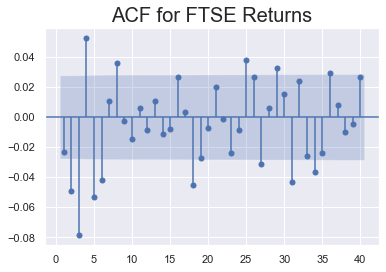

In [17]:
# MA need to use ACF to see how many lags to include, from here we can see MA(8) would approximately be the optimal
# Some higher lags are significant. However, the coefficient show be rather low as we assume it's further past and not influencing the model
sgt.plot_acf(df.returns[1:], zero=False, lags=40)
plt.title('ACF for FTSE Returns', size=20)
plt.show()

## MA(1) for Returns

In [10]:
# the order first index is referring to AR, the second one is for MA
model_ma_1 = ARMA(df.returns[1:], order=(0,1))
result_ma_1 = model_ma_1.fit()
result_ma_1.summary()
# the p value for the first lag is 0.085 < 0.1, we've already seen from ACF that it's not significant

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 1)   Log Likelihood               -7929.595
Method:                       css-mle   S.D. of innovations              1.174
Date:                Wed, 10 Mar 2021   AIC                          15865.190
Time:                        09:45:37   BIC                          15884.754
Sample:                    01-10-1994   HQIC                         15872.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.016      1.162      0.245      -0.013       0.050
ma.L1.returns    -0.0257      0.015     -1.720      0.085      -0.055       0.004
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           38.8550           +0.0000j           38.8550            0.0000
-----------------------------------------------------------------------------
"""

## Higher-Lag MA Models for Returns

In [12]:
# all the coefficient became significant
model_ma_2 = ARMA(df.returns[1:], order=(0,2))
result_ma_2 = model_ma_2.fit()
print(result_ma_2.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_1, model_ma_2)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 10 Mar 2021   AIC                          15853.728
Time:                        10:18:40   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [18]:
model_ma_3 = ARMA(df.returns[1:], order=(0,3))
result_ma_3 = model_ma_2.fit()
print(result_ma_3.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_2, model_ma_3)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 2)   Log Likelihood               -7922.864
Method:                       css-mle   S.D. of innovations              1.173
Date:                Wed, 10 Mar 2021   AIC                          15853.728
Time:                        10:24:52   BIC                          15879.812
Sample:                    01-10-1994   HQIC                         15862.868
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0188      0.015      1.239      0.215      -0.011       0.049
ma.L1.returns    -0.0327      0.014     -2.297      0.022      -0.061      -0.005
ma.L2.returns    -0.0502      0.014     

In [19]:
model_ma_4 = ARMA(df.returns[1:], order=(0,4))
result_ma_4 = model_ma_4.fit()
print(result_ma_4.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_3, model_ma_4)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 4)   Log Likelihood               -7898.773
Method:                       css-mle   S.D. of innovations              1.167
Date:                Wed, 10 Mar 2021   AIC                          15809.547
Time:                        10:25:13   BIC                          15848.674
Sample:                    01-10-1994   HQIC                         15823.257
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.305      0.192      -0.009       0.047
ma.L1.returns    -0.0203      0.014     -1.443      0.149      -0.048       0.007
ma.L2.returns    -0.0551      0.014     

In [20]:
model_ma_5 = ARMA(df.returns[1:], order=(0,5))
result_ma_5 = model_ma_5.fit()
print(result_ma_5.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_4, model_ma_5)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 5)   Log Likelihood               -7892.823
Method:                       css-mle   S.D. of innovations              1.166
Date:                Wed, 10 Mar 2021   AIC                          15799.645
Time:                        10:28:04   BIC                          15845.294
Sample:                    01-10-1994   HQIC                         15815.641
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.376      0.169      -0.008       0.046
ma.L1.returns    -0.0262      0.014     -1.851      0.064      -0.054       0.002
ma.L2.returns    -0.0497      0.014     

In [21]:
model_ma_6 = ARMA(df.returns[1:], order=(0,6))
result_ma_6 = model_ma_6.fit()
print(result_ma_6.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_5, model_ma_6)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 6)   Log Likelihood               -7889.221
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 10 Mar 2021   AIC                          15794.442
Time:                        10:28:07   BIC                          15846.612
Sample:                    01-10-1994   HQIC                         15812.723
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.430      0.153      -0.007       0.045
ma.L1.returns    -0.0237      0.014     -1.682      0.093      -0.051       0.004
ma.L2.returns    -0.0486      0.014     

In [22]:
model_ma_7 = ARMA(df.returns[1:], order=(0,7))
result_ma_7 = model_ma_7.fit()
print(result_ma_7.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_6, model_ma_7)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 7)   Log Likelihood               -7889.046
Method:                       css-mle   S.D. of innovations              1.165
Date:                Wed, 10 Mar 2021   AIC                          15796.091
Time:                        10:28:10   BIC                          15854.782
Sample:                    01-10-1994   HQIC                         15816.657
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.013      1.418      0.156      -0.007       0.045
ma.L1.returns    -0.0247      0.014     -1.739      0.082      -0.052       0.003
ma.L2.returns    -0.0488      0.014     

In [24]:
# the reason we fit one more lag here is beacuse from ACF graph we can see that the 8th lag is significant
# it does improve from MA(7)! but now we need to examine if MA(8) is better than MA(6)
model_ma_8 = ARMA(df.returns[1:], order=(0,8))
result_ma_8 = model_ma_8.fit()
print(result_ma_8.summary())
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_7, model_ma_8)))

                              ARMA Model Results                              
Dep. Variable:                returns   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood               -7885.603
Method:                       css-mle   S.D. of innovations              1.164
Date:                Wed, 10 Mar 2021   AIC                          15791.205
Time:                        10:28:56   BIC                          15856.417
Sample:                    01-10-1994   HQIC                         15814.056
                         - 04-05-2013                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0189      0.014      1.364      0.173      -0.008       0.046
ma.L1.returns    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.returns    -0.0495      0.014     

In [25]:
# it's better as p-value < 0.05
print('Log-Likelihood Test p-value', str(LLR_test(model_ma_6, model_ma_8, DF=2)))

Log-Likelihood Test p-value 0.027


## Residuals for Returns

In [31]:
df['residual_re'] = result_ma_8.resid

<ipython-input-31-6188e7ffbc2f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual_re'] = result_ma_8.resid


In [36]:
round(df.residual_re.mean(), 3)

-0.0

In [34]:
df.residual_re.var()

1.3552546717961282

In [37]:
print(np.sqrt(df.residual_re.var()))
df.residual_re.std()

1.1641540584459293


1.1641540584459293

In [40]:
# confidence interval
# it's a bad model as it means that the return can be really wrong and has a too high range
print((df.residual_re.mean()- 3* df.residual_re.std(), df.residual_re.mean()+ 3* df.residual_re.std()))

(-3.492519339951999, 3.492405010723577)


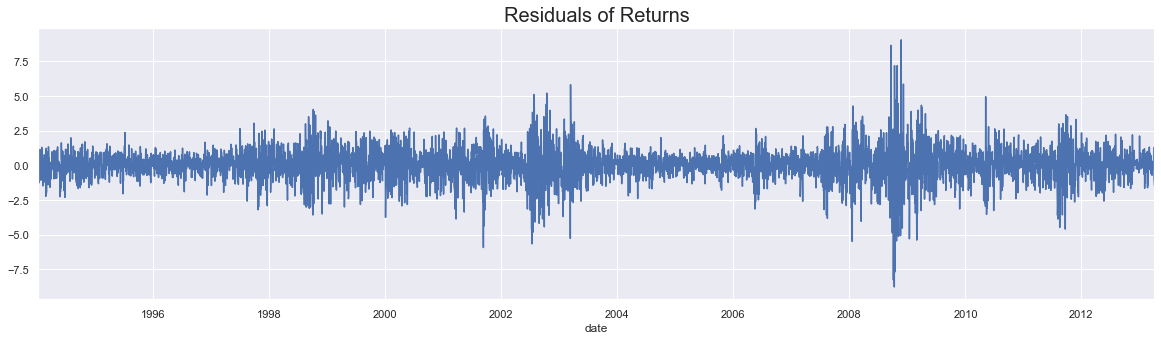

In [39]:
df.residual_re[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns', size=20)
plt.show()

In [42]:
# this means that it's stationary, but is it white noises? NO, you might want to examine through ACF
sts.adfuller(df.residual_re[1:])

(-70.83821741773954,
 0.0,
 0,
 5019,
 {'1%': -3.4316535759402753,
  '5%': -2.8621160400844468,
  '10%': -2.567076626752987},
 15689.881920338994)

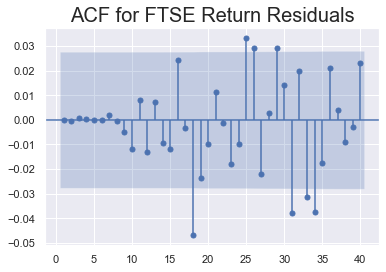

In [43]:
# if it's white noises, then the ACF graph should have no significant coefficient
# for the first 8 lags, because they're included in our MA(8) model, so it's reasonable that they're close to zero
# for 9-17, they're also not significant, which is a testament for our MA(8) model (it's good)
# However, for 18 lags and onwards, some of the coefficients are significant, means that in a longer preiod back, the market was doing adjustment
sgt.plot_acf(df.residual_re[1:], zero=False, lags=40)
plt.title('ACF for FTSE Return Residuals', size=20)
plt.show()

## Normalized Returns

In [44]:
bench_re = df.returns.iloc[1]

In [45]:
df['norm_re'] = df.returns.div(bench_re).mul(100)

<ipython-input-45-0797274560e4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['norm_re'] = df.returns.div(bench_re).mul(100)


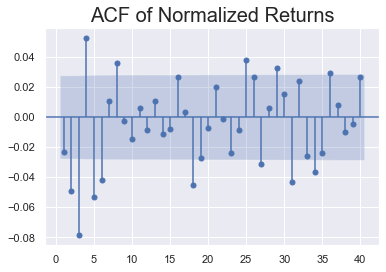

In [46]:
sgt.plot_acf(df.norm_re[1:], zero=False, lags=40)
plt.title('ACF of Normalized Returns', size=20)
plt.show()

In [47]:
model_norm_ma_8 = ARMA(df.norm_re[1:], order=(0,8))
result_norm_ma_8 = model_norm_ma_8.fit()
result_norm_ma_8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                norm_re   No. Observations:                 5020
Model:                     ARMA(0, 8)   Log Likelihood              -40307.597
Method:                       css-mle   S.D. of innovations            742.822
Date:                Wed, 10 Mar 2021   AIC                          80635.194
Time:                        11:35:34   BIC                          80700.406
Sample:                    01-10-1994   HQIC                         80658.045
                         - 04-05-2013                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const           -11.9731      8.846     -1.354      0.176     -29.310       5.364
ma.L1.norm_re    -0.0238      0.014     -1.688      0.091      -0.051       0.004
ma.L2.norm_re    -0.0495      0.014     -3.514      0.000      -0.077      -0.022
ma.L3.norm_re    -0.0847      0.014     -5.993      0.000      -0.112      -0.057
ma.L4.norm_re     0.0488      0.014      3.440      0.001       0.021       0.077
ma.L5.norm_re    -0.0518      0.014     -3.634      0.000      -0.080      -0.024
ma.L6.norm_re    -0.0402      0.014     -2.787      0.005      -0.068      -0.012
ma.L7.norm_re     0.0084      0.014      0.587      0.557      -0.020       0.036
ma.L8.norm_re     0.0366      0.014      2.626      0.009       0.009       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.4716           -0.4282j            1.5326           -0.0451
MA.2            1.4716           +0.4282j            1.5326            0.0451
MA.3            0.5944           -1.3169j            1.4448           -0.1825
MA.4            0.5944           +1.3169j            1.4448            0.1825
MA.5           -0.7318           -1.2736j            1.4689           -0.3330
MA.6           -0.7318           +1.2736j            1.4689            0.3330
MA.7           -1.4485           -0.6983j            1.6081           -0.4285
MA.8           -1.4485           +0.6983j            1.6081            0.4285
-----------------------------------------------------------------------------
"""

In [48]:
df['residual_norm_re'] = result_norm_ma_8.resid

<ipython-input-48-d53876e98d18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['residual_norm_re'] = result_norm_ma_8.resid


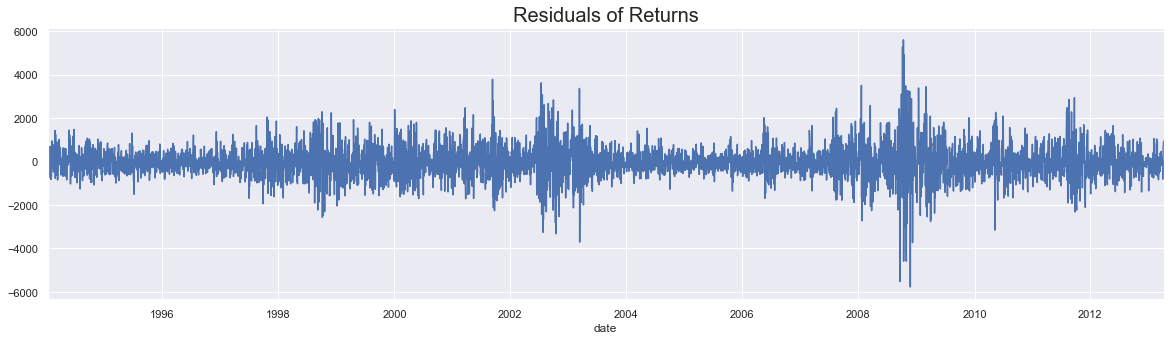

In [49]:
df.residual_norm_re[1:].plot(figsize=(20,5))
plt.title('Residuals of Returns', size=20)
plt.show()

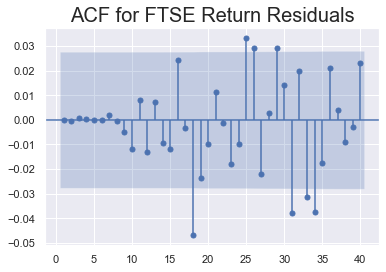

In [50]:
# it shows that the residual is not very white noise, more detailed analysis look at the previous cell
sgt.plot_acf(df.residual_norm_re[1:], zero=False, lags=40)
plt.title('ACF for FTSE Return Residuals', size=20)
plt.show()

## MA Models For Prices

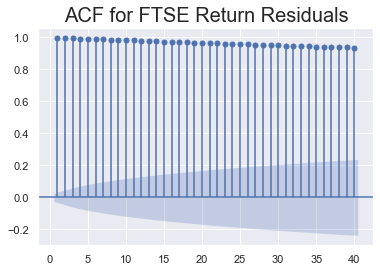

In [51]:
sgt.plot_acf(df.market_value[1:], zero=False, lags=40)
plt.title('ACF for FTSE Return Residuals', size=20)
plt.show()

In [52]:
# the coefficient is extremely close to 1, which means the the MA model preserved most of the information and maginitude of the error
# a MA model for non-stationary is actually same as a AR(n) model with one more error term from n periods back taken into account
p_model_ma_1 = ARMA(df.market_value, order=(0,1))
p_result_ma_1 = p_model_ma_1.fit()
p_result_ma_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:           market_value   No. Observations:                 5021
Model:                     ARMA(0, 1)   Log Likelihood              -38629.000
Method:                       css-mle   S.D. of innovations            530.756
Date:                Wed, 10 Mar 2021   AIC                          77264.000
Time:                        11:45:48   BIC                          77283.564
Sample:                    01-07-1994   HQIC                         77270.856
                         - 04-05-2013                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5089.5837     14.660    347.186      0.000    5060.852    5118.316
ma.L1.market_value     0.9573      0.003    335.560      0.000       0.952       0.963
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0446           +0.0000j            1.0446            0.5000
-----------------------------------------------------------------------------
"""

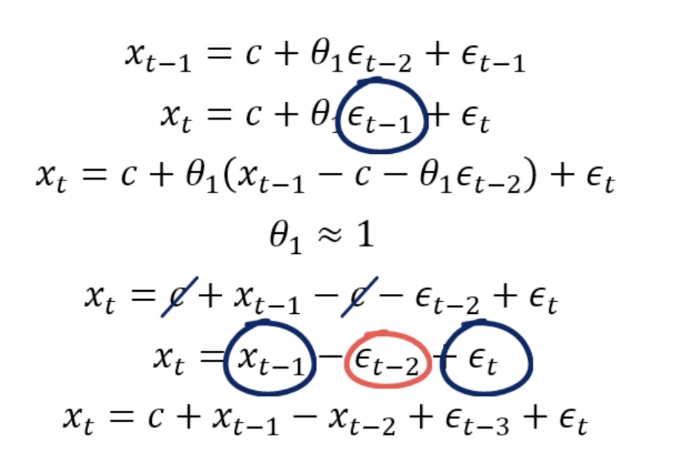